# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> EE 046211 - Technion - Deep Learning
---

## HW1 - Optimization and Automatic Differentiation
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name     |Campus Email| ID  |
|---------|--------------------------------|----------|
|Roy Elkabetz| roy-e@campus.technion.ac.il| 300427259|
|Tal Horovits| tal.hor@campus.technion.ac.il| 305089047|


### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**. 
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ee046211_hw1_id1_id2.ipynb`.
    * If you answered the questionss in a different file you should submit a `.zip` file with the name `ee046211_hw1_id1_id2.zip` with content:
        * `ee046211_hw1_id1_id2.ipynb` - the code tasks
        * `ee046211_hw1_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw1` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Convergence of Gradient Descent](#-Question-1---Convergence-of-Gradient-Descent)
    * [Q2 - 1D Quadratic Optimization](#-Question-2---1D-Quadratic-Optimization)
    * [Q3 - Autodiff 1](#-Question-3----Automatic-Differentiation)
    * [Q4 - Autodiff 2](#-Question-4----Automatic-Differentiation-2)
* [Part 2 - Code Assignments](#-Part-2---Code-Assignments)
    * [Task 1 - The Beale Function](#-Task-1---The-Beale-Function)
    * [Task 2 - Building an Optimizer - Nesterov Momentum](#-Task-2---Building-an-Optimizer---Nesterov-Momentum)
    * [Task 3 - PyTorch Autograd](#-Task-3---PyTorch-Autograd)
    * [Task 4 - Low Rank Matrix Factorization](#-Task-4---Low-Rank-Matrix-Factorization)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 - Convergence of Gradient Descent
---
Recall from the lecture notes:

* **Definition**: A function $f$ is $\beta$-smooth if: $$ \forall w_1, w_2 \in \mathbb{R}^d: ||\nabla f(w_1) - \nabla f(w_2)|| \leq \beta ||w_1 -w_2|| $$
* **Lemma**: If $f$ is $\beta$-smooth then $$ f(w_1) -f(w_2) -\nabla f(w_2)^T (w_1-w_2) \leq \frac{\beta}{2} ||w_1-w_2||^2 $$

Prove the lemma.

Hints:
* Represent $f$ as an integral: $f(x) − f(y) = \int_0^1 \nabla f(y + t(x-y))^T(x-y) dt $
* Make use of Cauchy-Schwarz.

## <img src="https://img.icons8.com/clouds/100/26e07f/about.png" style="height:50px;display:inline">Question 1 - <span style="color: HotPink">Solution</span>
---
Let us use the integral formula from above

$$
f(x) − f(y) = \int_0^1 \nabla f(y + t(x-y))^T(x-y) dt
$$
verifying the integral formula 

$$
\begin{align}
\int_0^1 \nabla f(y + t(x-y))^T(x-y) dt &= \frac{f(y + t(x-y))}{(x-y)}(x-y)|_0^1\\
                                        &= f(y + t(x-y))|_0^1\\
                                        &= f(y + 1(x-y)) - f(y + 0(x-y))\\
                                        &= f(x) - f(y)\\
\end{align}
$$

So 
$$
\begin{align}
    \vert f(w_1) -f(w_2) -\nabla f(w_2)^T (w_1-w_2)\vert &= \vert\int_0^1 \nabla f(w_2 + t(w_1-w_2))^T(w_1-w_2) dt -\nabla f(w_2)^T (w_1-w_2)\vert\\
                                              &= \vert\int_0^1 \nabla f(w_2 + t(w_1-w_2))^T(w_1-w_2) dt -\int_0^1\nabla f(w_2)^T (w_1-w_2)dt\vert\\
                                              &= \vert\int_0^1 \left(\nabla f(w_2 + t(w_1-w_2))^T(w_1-w_2)  -\nabla f(w_2)^T (w_1-w_2)\right)dt\vert\\
                  \color{#FE6F5E}{\text{(I)}} &\leq \int_0^1 \vert\left(\nabla f(w_2 + t(w_1-w_2))^T  -\nabla f(w_2)^T \right)(w_1-w_2)\vert dt\\
                 \color{#FE6F5E}{\text{(II)}} &\leq \int_0^1 \Vert\nabla f(w_2 + t(w_1-w_2))^T  -\nabla f(w_2)^T \Vert\cdot \Vert w_1-w_2\Vert dt\\
                \color{#FE6F5E}{\text{(III)}} &\leq \int_0^1 \beta\Vert w_2 + t(w_1-w_2)  -w_2 \Vert\cdot \Vert w_1-w_2\Vert dt\\
                                              &= \int_0^1 \beta\Vert t(w_1-w_2) \Vert dt\cdot \Vert w_1-w_2\Vert\\
                                              &= \beta\int_0^1  t dt\cdot \Vert w_1-w_2\Vert^2\\
                                              &= \frac{\beta}{2} t^2|_0^1  \cdot \Vert w_1-w_2\Vert^2\\
                                              &= \frac{\beta}{2} \Vert w_1-w_2 \Vert^2\\
\end{align}
$$
where in $\color{#FE6F5E}{\text{(I)}}$ we used a simple integral inequality 
$$
\vert \int f(t)dt\vert\leq\int\vert f(t)\vert dt
$$
in $\color{#FE6F5E}{\text{(II)}}$ we used the Cauchy–Schwarz inequality
$$
\vert \left\langle v, u \right\rangle\vert \leq \Vert v\Vert \Vert u\Vert
$$
and in $\color{#FE6F5E}{\text{(III)}}$ we used the $\beta$-smoothness (Lipschitz) property.              

<div style="text-align: right"> $\color{#4CBB17}{\rule{1.7ex}{1.7ex}}$ </div>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 - 1D Quadratic Optimization
---
We examine the following model: $$ f(w) = \sum_{n=1}^N h_nw^2$$
The SGD update with $M=1$: $$ w(t) = w(t-1) -\eta h_{n(t)}w(t-1) = (1-\eta h_{n(t)})w(t-1) $$
$n(t)$ sampled from $\{1,...,N\}$ without replacement.

We define: $$ h \triangleq \mathbb{E}h_{n(t)} = \frac{1}{N}\sum_{n=1}^Nh_n $$ $$ \rho \triangleq Var(h_{n(t)})= \frac{1}{N}\sum_{n=1}^Nh_n^2 -h^2$$


Show that:

1. $\mathbb{E}w(t) = (1-\eta h)\mathbb{E}w(t-1)$
2. $\mathbb{E}w^2(t) = ((1-\eta h)^2 +\eta^2 \rho)\mathbb{E}w^2(t-1)$

## <img src="https://img.icons8.com/clouds/100/26e07f/about.png" style="height:50px;display:inline">Question 2  - <span style="color: HotPink">Solution</span>
---
1. Let us compute the expected value $(\mathbb{E})$ of $w(t)$:

$$
\begin{align}
    \mathbb{E}\left[w(t)\right] &= \mathbb{E}\left[w(t-1) -\eta h_{n(t)}w(t-1)\right]\\
                                &= \mathbb{E}\left[w(t-1)\right] -\eta\mathbb{E}\left[ h_{n(t)}w(t-1)\right]\\
    \color{#FE6F5E}{\text{(I)}} &= \mathbb{E}\left[w(t-1)\right] -\eta\mathbb{E}\left[ h_{n(t)}\right]\mathbb{E}\left[w(t-1)\right]\\
   \color{#FE6F5E}{\text{(II)}} &= \mathbb{E}\left[w(t-1)\right] -\eta h\mathbb{E}\left[w(t-1)\right]\\
                                &= \left(1 -\eta h\right)\mathbb{E}\left[w(t-1)\right]
\end{align}
$$
- At $\color{#FE6F5E}{\text{(I)}}$ we based on the fact that $w(t-1)$ is just a constant vector for all $h_n$ values (independent of $h_n$).
- At $\color{#FE6F5E}{\text{(II)}}$ we used the definition of $h$.

<div style="text-align: right"> $\color{#4CBB17}{\rule{1.7ex}{1.7ex}}$ </div>


2. Next, let us compute the expected value $(\mathbb{E})$ of $w(t)$:

$$
\begin{align}
    \mathbb{E}\left[w^2(t)\right] &= \mathbb{E}\left[\left((1-\eta h_{n(t)})w(t-1)\right)^2\right]\\
                                  &= \mathbb{E}\left[\left(1-\eta h_{n(t)}\right)^2 w^2(t-1)\right]\\
      \color{#FE6F5E}{\text{(I)}} &= \mathbb{E}\left[\left(1-\eta h_{n(t)}\right)^2\right]\mathbb{E}\left[ w^2(t-1)\right]\\
                                  &= \mathbb{E}\left[(1-2\eta h_{n(t)}+\eta^2 h^2_{n(t)})\right]\mathbb{E}\left[ w^2(t-1)\right]\\
     \color{#FE6F5E}{\text{(II)}} &= (1-2\eta h+\eta^2 \mathbb{E}\left[h^2_{n(t)}\right])\mathbb{E}\left[ w^2(t-1)\right]\\
                                  &= (1-2\eta h+\eta^2 \mathbb{E}\left[h^2_{n(t)}-h^2+h^2\right])\mathbb{E}\left[ w^2(t-1)\right]\\
                                  &= (1-2\eta h+\eta^2 h^2+\eta^2 \mathbb{E}\left[h^2_{n(t)}-h^2\right])\mathbb{E}\left[ w^2(t-1)\right]\\
    \color{#FE6F5E}{\text{(III)}} &= \left((1-\eta h)^2+\eta^2 \rho\right)\mathbb{E}\left[ w^2(t-1)\right]\\
\end{align}
$$
- At $\color{#FE6F5E}{\text{(I)}}$ we based on the fact that $w(t-1)$ is independent of $h_n$ and so does $w^2(t-1)$ (same argument as in previous calculation).
- At $\color{#FE6F5E}{\text{(II)}}$ we used the definition of $h$.
- At $\color{#FE6F5E}{\text{(III)}}$ we used the definition of $\rho$.

<div style="text-align: right"> $\color{#4CBB17}{\rule{1.7ex}{1.7ex}}$ </div>


## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 -  Automatic Differentiation
---

Consider the scalar function: $$ f = \exp(\exp(x) + \exp(x)^2) +\sin(\exp(x) + \exp(x)^2) $$

1. Write down the derivative w.r.t. $x$ explicitly, i.e., $\frac{d f}{d x}$
2. We define the following intermediate variables: $$ a = \exp(x) $$ $$ b=a^2 $$ $$ c = a+b $$ $$ d=\exp(c) $$ $$ e=\sin(c) $$ $$ f=d+e $$ Draw a graph picturing the relationship between all variables (called the **computation graph**).
3. Using the graph, write down the derivatives of the individual terms, working backwards to compute the derivative of $f$ (i.e., write down the derivatives $\frac{df}{dd}, \frac{df}{de}, ..., \frac{df}{dx}$)

## <img src="https://img.icons8.com/clouds/100/26e07f/about.png" style="height:50px;display:inline">Question 3  - <span style="color: HotPink">Solution</span>
---

1. For the derivative calculation let us use the intermediate variables definition from (2), then

$$
\begin{align}
    f(x) &= \exp(\exp(x) + \exp(x)^2) +\sin(\exp(x) + \exp(x)^2)\\
    f(x) &= d + e\\
\end{align}
$$

Next, we take the derivative with respect to $x$ of both sides of the equation

$$
\begin{align}
    \frac{df}{dx} &= \frac{dd}{dx} + \frac{de}{dx}\\
                  &= \frac{dd}{dc}\frac{dc}{dx} + \frac{de}{dc}\frac{dc}{dx}\\
                  &= \frac{dd}{dc}\left(\frac{dc}{da}\frac{da}{dx}+\frac{dc}{db}\frac{db}{dx}\right) + \frac{de}{dc}\left(\frac{dc}{da}\frac{da}{dx}+\frac{dc}{db}\frac{db}{dx}\right)\\
                  &= \left(\frac{dd}{dc} + \frac{de}{dc}\right)\left(\frac{dc}{da}\frac{da}{dx}+\frac{dc}{db}\frac{db}{dx}\right)\\
                  &= \left(\frac{dd}{dc} + \frac{de}{dc}\right)\left(\frac{dc}{da}\frac{da}{dx}+\frac{dc}{db}\frac{db}{da}\frac{da}{dx}\right)\\
\end{align}
$$

Now we can place back the original function and compute the derivatives

$$
\begin{align}
    \frac{df}{dx} &= \left(\frac{dd}{dc} + \frac{de}{dc}\right)\left(\frac{dc}{da}\frac{da}{dx}+\frac{dc}{db}\frac{db}{da}\frac{da}{dx}\right)\\
                  &= \left(\frac{d\exp(c)}{dc} + \frac{d\sin(c)}{dc}\right)\left(\frac{d(a+b)}{da}\frac{d\exp(x)}{dx}+\frac{d(a+b)}{db}\frac{d(a^2)}{da}\frac{d\exp(x)}{dx}\right)\\
                  &= \left(\exp(c) + \cos(c)\right)\left(1\cdot\exp(x)+1\cdot(2a)\exp(x)\right)\\
                  &= \left(\exp(a+b) + \cos(a+b)\right)\left(\exp(x)+2a\exp(x)\right)\\
                  &= \left(\exp(\exp(x)+\exp^2(x)) + \cos(\exp(x)+\exp^2(x))\right)\left(\exp(x)+2\exp(x)\exp(x)\right)\\
                  &= \left(\exp\left(\exp(x)+\exp^2(x)\right) + \cos\left(\exp(x)+\exp^2(x)\right)\right)\left(\exp(x)+2\exp^2(x)\right)\\
\end{align}
$$


---
$\color{#9370DB}{\text{!!!}}$ _Let us verify the result with a straightforward computation_ $\color{#9370DB}{\text{!!!}}$
$$
\color{#9370DB}{
\begin{align}
f\left(x\right)	&=\exp\left(\exp\left(x\right)+\exp^{2}\left(x\right)\right)+\sin\left(\exp\left(x\right)+\exp^{2}\left(x\right)\right)\\
\frac{df}{dx}	&=\exp\left(\exp\left(x\right)+\exp^{2}\left(x\right)\right)\left(\frac{d\left(\exp\left(x\right)+\exp^{2}\left(x\right)\right)}{dx}\right)+\cos\left(\exp\left(x\right)+\exp^{2}\left(x\right)\right)\left(\frac{d\left(\exp\left(x\right)+\exp^{2}\left(x\right)\right)}{dx}\right)\\
	&=\left(\exp\left(\exp\left(x\right)+\exp^{2}\left(x\right)\right)+\cos\left(\exp\left(x\right)+\exp^{2}\left(x\right)\right)\right)\left(\frac{d\left(\exp\left(x\right)+\exp^{2}\left(x\right)\right)}{dx}\right)\\
	&=\left(\exp\left(\exp\left(x\right)+\exp^{2}\left(x\right)\right)+\cos\left(\exp\left(x\right)+\exp^{2}\left(x\right)\right)\right)\left(\frac{d\exp\left(x\right)}{dx}+\frac{d\left(\exp\left(x\right)\right)^{2}}{dx}\right)\\
	&=\left(\exp\left(\exp\left(x\right)+\exp^{2}\left(x\right)\right)+\cos\left(\exp\left(x\right)+\exp^{2}\left(x\right)\right)\right)\left(\exp\left(x\right)+\frac{d\left(\exp\left(x\right)\right)^{2}}{d\exp\left(x\right)}\frac{d\exp\left(x\right)}{dx}\right)\\
	&=\left(\exp\left(\exp\left(x\right)+\exp^{2}\left(x\right)\right)+\cos\left(\exp\left(x\right)+\exp^{2}\left(x\right)\right)\right)\left(\exp\left(x\right)+2\exp\left(x\right)\exp\left(x\right)\right)\\
	&=\left(\exp\left(\exp\left(x\right)+\exp^{2}\left(x\right)\right)+\cos\left(\exp\left(x\right)+\exp^{2}\left(x\right)\right)\right)\left(\exp\left(x\right)+2\exp^{2}\left(x\right)\right)\\
\end{align}
}
$$


---

2. The computation graph of $f(x)$ is illustrated in the next figure

<div>
<img src="./Figures/hw1q3_2_computation_graph-3.png" width="50%"/>
</div>

---

3. Let us first write the "local" derivatives over the computation graph and then use those to compute the derivative of $f$ with respect to each variable as asked in the question ($\frac{df}{dd}, \frac{df}{de}, ..., \frac{df}{dx}$).

<div>
<img src="./Figures/hw1q3_2_computation_graph_derivatives-2.png" width="50%"/>
</div>


$$
\begin{align}
    \frac{df}{dd} &=\boxed{1}\\
    \frac{df}{de} &=\boxed{1}\\
    \frac{df}{dc} &= \frac{df}{dd}\frac{dd}{dc}+\frac{df}{de}\frac{de}{dc}\\ 
                  &= 1\cdot \exp(c)+1\cdot \cos(c)\\
                  &= \boxed{\exp(c)+ \cos(c)}\\
    \frac{df}{db} &=\left(\frac{df}{dd}\frac{dd}{dc}+\frac{df}{de}\frac{de}{dc}\right)\frac{dc}{db}\\ 
                  &= \boxed{\left(\exp(c)+ \cos(c)\right)\cdot 1}\\
    \frac{df}{da} &= \left(\frac{df}{dd}\frac{dd}{dc}+\frac{df}{de}\frac{de}{dc}\right)\left(\frac{dc}{db}\frac{db}{da}+\frac{dc}{da}\right)\\
                  &= \boxed{\left(\exp(c)+ \cos(c)\right)\left(1\cdot 2a+1\right)}\\
    \frac{df}{dx} &= \left(\frac{df}{dd}\frac{dd}{dc}+\frac{df}{de}\frac{de}{dc}\right)\left(\frac{dc}{db}\frac{db}{da}\frac{da}{dx}+\frac{dc}{da}\frac{da}{dx}\right)\\
    &= \left(\exp(c)+ \cos(c)\right)\left(1\cdot 2a\exp(x)+1\exp(x)\right)\\
    &= \left(\exp(c)+ \cos(c)\right)\left(2a\exp(x)+\exp(x)\right)\\
    &= \boxed{\left(\exp(\exp(x)+\exp^2(x))+ \cos(\exp(x)+\exp^2(x))\right)\left(2\exp^2(x)+\exp(x)\right)}\\
\end{align}
$$

These are all the individual terms computed from "local" derivatives as shown in the computation graph above.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 4 -  Automatic Differentiation 2
---
Write down the chain rule in the dual numbers representation for the following: $$ f(g(h(x + \epsilon x'))) $$ What is $ \frac{df(x)}{dx} $?

## <img src="https://img.icons8.com/clouds/100/26e07f/about.png" style="height:50px;display:inline">Question 4  - <span style="color: HotPink">Solution</span>
---

The chain rule for $\frac{df(x)}{dx}$ is given by

$$
\begin{align}
    \frac{df(x)}{dx} = \frac{df(g)}{dg}\cdot\frac{dg(h)}{dh}\cdot\frac{dh(z)}{dz}\cdot\frac{dz(x)}{dx}
\end{align}
$$

where we defined $z\triangleq x+\epsilon x'$.

### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of aall of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

In [1]:
# imports for the practice (you can add more if you need)
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors
colors = list(mcolors.BASE_COLORS.keys())
from sklearn.datasets import load_iris
seed = 211
np.random.seed(seed)
torch.manual_seed(seed)
# %matplotlib notebook
%matplotlib inline

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1 - The Beale Function
---
The Beale function is defined as follows: $$ f(x, y) = (1.5 - x + xy)^{2} + (2.25 - x + xy^{2})^{2} + (2.625 - x +xy^{3})^{2}$$

1. What is the global minima of this function?
2. Implement the Beale function: `beale_f(x,y)`.
3. Implement a function, `beale_grads(x,y)` that returns the gradients of the Beale function.
4. 3D plot the Beale function wit the global minima you found. Use Matplotlib's `ax.plot_surface(x_mesh, y_mesh, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)` for the function, and `ax.plot(x, y, f(x, y), 'r*', markersize=20)` for the minima.
4. 2D plot the contours with `ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-.5, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)` and the minima with `ax.plot(x, y, 'r*', markersize=20)`.

Your Answers Here

1. We can easily see that $\forall x,y\in\mathbb{R},\,\, f(x,y)\geq 0$, which means that if there are $x_0,y_0$ for which $f(x_0,y_0)=0$ then $(x_0,y_0)$ is the global minima. Lets start by computing the gradient

$$
\begin{align}
    \frac{\partial f}{\partial x} &= 2(1.5 - x + xy)(-1 + y) + 2(2.25 - x + xy^{2})(- 1 + y^{2}) + 2(2.625 - x +xy^{3})(- 1 +y^{3})\\
                                  &= 2(1.5 - x + xy)(y-1) + 2(2.25 - x + xy^{2})(y-1)(y+1) + 2(2.625 - x +xy^{3})(y-1)(y^2+y+1)\\
                                  &= 2\left((1.5 - x + xy) + (2.25 - x + xy^{2})(y+1) + (2.625 - x +xy^{3})(y^2+y+1)\right)(y-1)\\
\end{align}
$$

$$
\begin{align}
    \frac{\partial f}{\partial y} &= 2(1.5 - x + xy)x + 2(2.25 - x + xy^{2})2xy + 2(2.625 - x +xy^{3})3xy^2\\
\end{align}
$$

It seems like there is an extremum line of points at $(x,y)=(0,y)$ of value
$$ f(0, y) = 1.5^{2} + 2.25^{2} + 2.625^{2}=14.203125$$
so as a first guess of the minima I'll take some point along that line.

In [2]:
# Set the manually calculated minima
min_x = 0
min_y = 1

def beale_f(x, y):
    value = None
    term1 = (1.5 - x + x * y) ** 2
    term2 = (2.25 - x + x * y ** 2) ** 2
    term3 = (2.625 - x + x * y ** 3) ** 2
    value = term1 + term2 + term3
    return value

def beale_grads(x, y):
    dx, dy = None, None
    dx = 2 * ((1.5 - x + x * y) * (y - 1) + 
              (2.25 - x + x * y ** 2) * (y ** 2 - 1) + 
              (2.625 - x + x * y ** 3) * (y ** 3 - 1))
    dy = 2 * ((1.5 - x + x * y) * x + 
              (2.25 - x + x * y ** 2) * 2 * x * y + 
              (2.625 - x + x * y ** 3) * 3 * x * y ** 2)
    grads = np.array([dx, dy])
    return grads

In [3]:
minima = np.array([min_x, min_y])
beale_res = beale_f(*minima)
grads_res = beale_grads(*minima)
print(f"minima (1x2 row vector shape): {minima}")
print(f"\nbeale_f output: {beale_res}")
print(f"\nbeale_grad output: {grads_res}")

minima (1x2 row vector shape): [0 1]

beale_f output: 14.203125

beale_grad output: [0. 0.]


In [4]:
# get meshgrid
nx, ny = (300, 300)
xv = np.linspace(-4.0, 4.0, nx)
yv = np.linspace(-4.0, 4.0, ny)
x_mesh, y_mesh = np.meshgrid(xv, yv)
z = beale_f(*np.array([x_mesh, y_mesh]))

# get global minima
glob_min_val = np.min(z)
glob_min_idx_x = np.int(np.argmin(z) % nx - 1) + 3
glob_min_idx_y = np.int(np.argmin(z) // ny)
min_xg, min_yg, min_zg = (xv[glob_min_idx_x], 
                          yv[glob_min_idx_y], 
                          beale_f(*np.array([xv[glob_min_idx_x], yv[glob_min_idx_y]])))
#print(glob_min_idx_x, glob_min_idx_y)
print('global minima (x, y, z) = ({}, {}, {})'.format(min_xg, min_yg, min_zg))

global minima (x, y, z) = (3.0367892976588626, 0.4949832775919729, 0.004850981756538529)


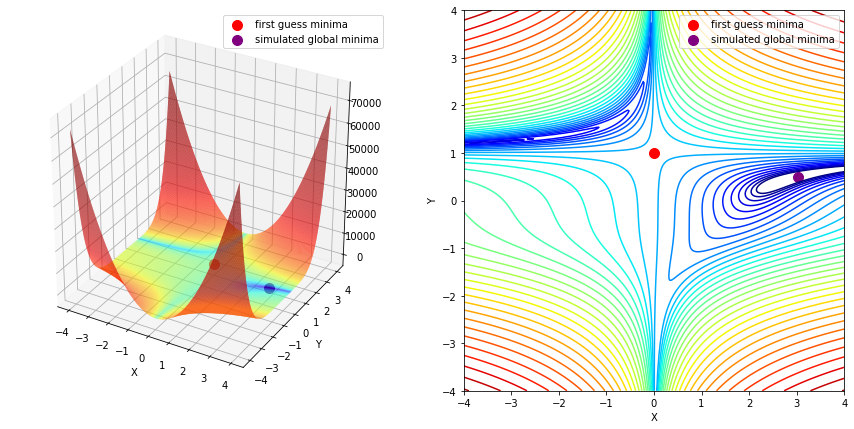

In [5]:
# plotting the beale function
#%matplotlib notebook
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(x_mesh, y_mesh, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax1.scatter(min_x, min_y, beale_f(*np.array([min_x, min_y])), s=100, c='red', label='first guess minima')
ax1.scatter(min_xg, min_yg, min_zg, s=100, c='purple', label='simulated global minima')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(x_mesh, y_mesh, z, levels=np.logspace(-.5, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax2.scatter(min_x, min_y, s=100, c='red', label='first guess minima')
ax2.scatter(min_xg, min_yg, s=100, c='purple', label='simulated global minima')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend()

# setting minima to be the global minima we found
minima = np.array([min_xg, min_yg])

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2 - Building an Optimizer - Nesterov Momentum
---
In this task, you are going to implement the Nesterov Momentum optimizer. We are giving the skeleton of the code and the description of the methods, and you need to implement the optimizer.

Recall the Nesterov Momentum update rule:
$$ z^{k+1} = \beta z^k -\alpha \nabla f(w^k +\beta z^k) $$ $$ w^{k+1} = w^k + z^{k+1} $$

1. Implement `class NesterovMomentumOptimizer()`. 
    * `function` is the Python function you want to optimize.
    * `gradients` is the Python function that returns the gradients of `function`.
    * `x_init` and `y_init` are the initialization points for the optimizer.
    * Save the `path` of the optimizer (the minima points the optimizer visits during the optimization).
    * Stopping criterion: change in minima `<1e-7`.
    * **You can change the class however you wish, you can remove/add varaibles and methods as you wish**
2. For ` x_init=0.7, y_init=1.4, learning_rate=0.01, momentum=0.9`, optimize the Beale function. Plot the results **with the path taken** (better do it on the 2D contour plot).
3. Choose different initialization and learning rate and show the results as in 2.

In [6]:
class NesterovMomentumOptimizer():
    def __init__(self, function, gradients, x_init=None, y_init=None, learning_rate=0.01, momentum=0.9):
        self.f = function
        self.g = gradients
        scale = 3.0
        self.path = None
        self.current_val = np.zeros([2])
        if x_init is not None:
            self.current_val[0] = x_init
        else:
            self.current_val[0] = np.random.uniform(low=-scale, high=scale)
            print("x_init: {:.3f}".format(self.curernt_val[0]))
        if y_init is not None:
            self.current_val[1] = y_init
        else:
            self.current_val[1] = np.random.uniform(low=-scale, high=scale)
        print("x_init: {:.3f}".format(self.current_val[0]))
        print("y_init: {:.3f}".format(self.current_val[1]))

        self.lr = learning_rate
        self.momentum = momentum
        self.velocity = np.zeros([2])
    
        # for accumulation of loss and path
        self.z_history = []
        self.x_history = []
        self.y_history = []
  
  
    def func(self, variables):
        """Beale function.

        Args:
          variables: input data, shape: 1-rank Tensor (vector) np.array
            x: x-dimension of inputs
            y: y-dimension of inputs

        Returns:
          z: Beale function value at (x, y)
        """
        return self.f(*variables)
        
  
    def gradients(self, variables):
        """Gradient of Beale function.

        Args:
          variables: input data, shape: 1-rank Tensor (vector) np.array
            x: x-dimension of inputs
            y: y-dimension of inputs

        Returns:
          grads: [dx, dy], shape: 1-rank Tensor (vector) np.array
            dx: gradient of Beale function with respect to x-dimension of inputs
            dy: gradient of Beale function with respect to y-dimension of inputs
        """
        return self.g(*variables)
       
      
    def weights_update(self, grads):
        """Weights update using Nesterov Momentum.

          v' = gamma * v - lr * grads
          w' = w + v
        """
        self.velocity = self.momentum * self.velocity - self.lr * grads
        self.current_val = self.current_val + self.velocity
        
    
    def history_update(self, z, x, y):
        """Accumulate all interesting variables, z = function(x,y)
        """
        if not self.path:
            self.path = []
        self.x_history.append(x)
        self.y_history.append(y)
        self.z_history.append(z)
    
    
    def train(self, max_steps):
        """
        Optimize the function using Nesterov Momentum
        """
        z = self.func(self.current_val)
        self.history_update(z, self.x, self.y)
        i = 0
        while i < max_steps and z >= 1e-7:
            grads = self.gradients(self.current_val)
            self.weights_update(grads)
            self.history_update(z, self.x, self.y)
            i += 1
        self.save_path()
        
    
    def save_path(self):
        self.path = np.array([np.array(self.x_history),
                              np.array(self.y_history),
                              np.array(self.z_history)])
        print('path saved. path shape is: {}'.format(self.path.shape))
            

    @property
    def x(self):
        return self.current_val[0]
  
    @property
    def y(self):
        return self.current_val[1]       

In [7]:
# choosing parameters
learning_rate = [0.01, 0.01, 0.001, 0.0005, 0.0001]
x_init = [0.7] + [-1.] * (len(learning_rate) - 1)
y_init = [1.4] + [2.] * (len(learning_rate) - 1)
paths = []

for i in range(len(learning_rate)):
    opt = NesterovMomentumOptimizer(beale_f, 
                                    beale_grads, 
                                    x_init=x_init[i], 
                                    y_init=y_init[i], 
                                    learning_rate=learning_rate[i], 
                                    momentum=0.9)
    %time
    opt.train(10000)
    print("Global minima")
    print("x*: {:.2f}  y*: {:.2f}".format(minima[0], minima[1]))
    print("Solution using the gradient descent")
    print("x: {:.4f}  y: {:.4f}\n".format(opt.x, opt.y))
    paths.append(opt.path)

x_init: 0.700
y_init: 1.400
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
path saved. path shape is: (3, 10001)
Global minima
x*: 3.04  y*: 0.49
Solution using the gradient descent
x: 3.0000  y: 0.5000

x_init: -1.000
y_init: 2.000
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
path saved. path shape is: (3, 10001)
Global minima
x*: 3.04  y*: 0.49
Solution using the gradient descent
x: 3.0000  y: 0.5000

x_init: -1.000
y_init: 2.000
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
path saved. path shape is: (3, 10001)
Global minima
x*: 3.04  y*: 0.49
Solution using the gradient descent
x: -7.2698  y: 1.1222

x_init: -1.000
y_init: 2.000
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
path saved. path shape is: (3, 10001)
Global minima
x*: 3.04  y*: 0.49
Solution using the gradient descent
x: -5.6763  y: 1.1523

x_init: -1.000
y_init: 2.000
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.06 µs
path saved.

In [8]:
# opt = NesterovMomentumOptimizer(beale_f, beale_grads, x_init=0.7, y_init=1.4, learning_rate=0.01, momentum=0.9)

In [9]:
# %time
# opt.train(1000)
# print("Global minima")
# print("x*: {:.2f}  y*: {:.2f}".format(minima[0], minima[1]))
# print("Solution using the gradient descent")
# print("x: {:.4f}  y: {:.4f}".format(opt.x, opt.y))

<IPython.core.display.Javascript object>


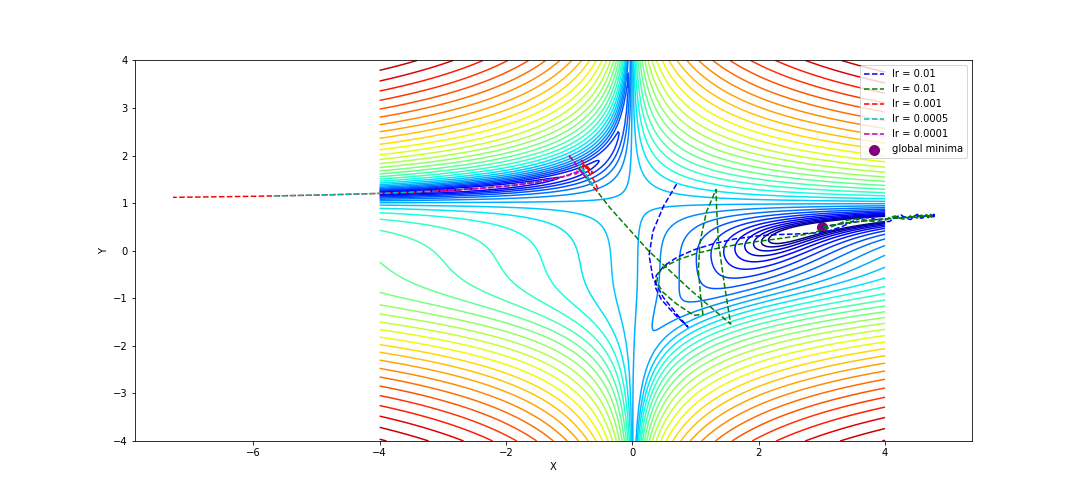

In [10]:
# (2) plotting the paths GD took
 
%matplotlib notebook
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot()
ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-.5, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
for i in range(len(paths)):
    label = 'lr = ' + str(learning_rate[i])
    ax.plot(paths[i][0, :], paths[i][1, :], '--', label=label, color=colors[i])
ax.scatter(3., 0.5, s=100, c='purple', label='global minima')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

We see that for different initial point with the same learning rate we still converge to the global minima. But, in the case we also change the learning rate (for the initial point we chose) the algorithm diverges.

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3 - PyTorch Autograd
---
For the function from the theory practice: $$ f = \exp(\exp(x) + \exp(x)^2) +\sin(\exp(x) + \exp(x)^2)  $$

1. Implement it and its dervative (explicitly) using `torch`.
2. Define a scalar tensor `x` and use `autograd` to calculate the derivative w.r.t $x$. Does the result correspond to the output of the function the calculates the derivative explicitly?

In [11]:
def f(x):
    f_val = None
    a = torch.exp(x)
    b = torch.pow(a, 2)
    c = a + b
    d = torch.exp(c)
    e = torch.sin(c)
    f_val = e + d
    return f_val

def derv_f(x):
    derv_val = None
    a = torch.exp(x)
    b = torch.pow(a, 2)
    c = a + b
    d = torch.exp(c)
    e = torch.cos(c)
    g = 2 * b
    h = g + a
    i = d + e
    derv_val = i * h
    return derv_val

In [12]:
x = torch.tensor(0.5, requires_grad=True)
print(x)
f_res = f(x)
f_manual_grad = derv_f(x.detach()) 

"""
Your Code Here
"""
# Calculate with torch autograd
y = torch.tensor(0.5, requires_grad=True)
f_autograd = f(y)
f_autograd.backward()



print(f_manual_grad)
print(y.grad)

tensor(0.5000, requires_grad=True)
tensor(555.9719)
tensor(555.9719)


We can see that the gradients of $y$ (which is the same as $x$) computed with autograd are the same as the gradients of $x$ calculated explicitly as expected.

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 4 - Low Rank Matrix Factorization 
---
Consider the following optimization problem: $$ \min_{\hat{U}, \hat{V}}||A - \hat{U}\hat{V}||_F^{2} $$ Where $A \in \mathcal{R}^{m \times n},\hat{U} \in \mathcal{R}^{m \times r}, \hat{V} \in \mathcal{R}^{r \times n} $ and $r < min(m,n)$ ($r$ is the rank of the matrix). $||\cdot||_F^2$ denotes the Frobenius norm.

1. Implement a function, `gd_factorize_ad(A, rank, num_epochs=1000, lr=0.01)`, that given a 2D tensor `A` and a `rank`, will calculate the low-rank factorization of `A` using **gradient decsent**. Compute and apply all the gradients of $\hat{U}$ and of $\hat{V}$ once per epoch. $\hat{U}$ and $\hat{V}$ should be initially created with uniform random values. Use PyTorch's `autograd` for the gradients.
    * To compute the squared Frobenius norm loss (reconstruction loss), use `torch.nn.functional.mse loss with reduction=’sum’`.

2. Use the provided `data` of the Iris dataset of 150 instances and 4 features. Apply `gd_factorize_ad` to compute the 2-rank matrix factorization of `data`. What is the reconstruction loss?

In [13]:
df = load_iris(as_frame=True).data
data = torch.tensor(df.iloc[:, [0, 1, 2, 3]].values)
data = data - data.mean(dim=0)

In [14]:
def gd_factorize_ad(A, rank, num_epochs=1000, lr=0.01):
    # initialize
    m, n = A.shape
    U = torch.rand((m, rank), requires_grad=True)
    V = torch.rand((rank, n), requires_grad=True)

    # implement gradient descent
    for epoch in range(num_epochs):
        
        # compute loss
        #loss = torch.nn.functional.mse_loss(A - U @ V, target=A, reduction='sum')
        loss = torch.sum(torch.pow(A - U @ V, 2))
        loss.backward()
        # update weights
        with torch.no_grad():
            # implement a GD step
            U -= lr * U.grad
            V -= lr * V.grad
            
            # Manually zero the gradients after updating weights
            U.grad = None
            V.grad = None
        if epoch % 50 == 0:
            print(f'epoch: {epoch}, loss: {loss}')
    return U, V

In [15]:
U, V = gd_factorize_ad(data.float(), rank=2, num_epochs=1000, lr=0.01)

epoch: 0, loss: 888.7951049804688
epoch: 50, loss: 51.358001708984375
epoch: 100, loss: 51.35597610473633
epoch: 150, loss: 51.351253509521484
epoch: 200, loss: 51.33935546875
epoch: 250, loss: 51.308048248291016
epoch: 300, loss: 51.22407531738281
epoch: 350, loss: 50.9979248046875
epoch: 400, loss: 50.39499282836914
epoch: 450, loss: 48.84514617919922
epoch: 500, loss: 45.2242431640625
epoch: 550, loss: 38.382896423339844
epoch: 600, loss: 29.460758209228516
epoch: 650, loss: 22.13089370727539
epoch: 700, loss: 18.073787689208984
epoch: 750, loss: 16.30362892150879
epoch: 800, loss: 15.612305641174316
epoch: 850, loss: 15.354080200195312
epoch: 900, loss: 15.259210586547852
epoch: 950, loss: 15.224555969238281


In [16]:
# lets compare singular values using SVD
with torch.no_grad():
    uA, sA, vA = np.linalg.svd(data.float())
    uf, sf, vf = np.linalg.svd(U @ V)
    print('###########  rank = 2 singular values comparison   ###########')
    print('The Iris data matrix singular values are: {}'.format(sA))
    print('The U @ V factorization singular values are: {}'.format(sf))
    print('The reconstruction loss is: {}'.format(torch.sum(torch.pow(data.float() - U @ V, 2))))


###########  rank = 2 singular values comparison   ###########
The Iris data matrix singular values are: [25.09996    6.0131474  3.4136806  1.8845235]
The U @ V factorization singular values are: [2.5099960e+01 6.0125346e+00 5.0453195e-07 3.1788329e-07]
The reconstruction loss is: 15.211915969848633


We see that the original matrix and the factorization $U@V$ agree over the values of the two largest singular values which is not surprising giving the fact the we factorized the data matrix using a rank$=2$ factorization. Using a rank$=3$ approximation we would get that the three largest values of the data matrix and the factorization agree, lets see...

In [17]:
U, V = gd_factorize_ad(data.float(), rank=3, num_epochs=1000, lr=0.01)
# lets compare singular values using SVD
with torch.no_grad():
    uA, sA, vA = np.linalg.svd(data.float())
    uf, sf, vf = np.linalg.svd(U @ V)
    print('\n\n')
    print('###########  rank = 3 singular values comparison   ###########')
    print('The Iris data matrix singular values are: {}'.format(sA))
    print('The U @ V factorization singular values are: {}'.format(sf))
    print('The reconstruction loss is: {}'.format(torch.sum(torch.pow(data.float() - U @ V, 2))))


epoch: 0, loss: 1062.3487548828125
epoch: 50, loss: 49.12678909301758
epoch: 100, loss: 21.313325881958008
epoch: 150, loss: 15.285606384277344
epoch: 200, loss: 15.189706802368164
epoch: 250, loss: 15.180594444274902
epoch: 300, loss: 15.167932510375977
epoch: 350, loss: 15.147253036499023
epoch: 400, loss: 15.11313247680664
epoch: 450, loss: 15.056598663330078
epoch: 500, loss: 14.96293830871582
epoch: 550, loss: 14.80856704711914
epoch: 600, loss: 14.557138442993164
epoch: 650, loss: 14.156450271606445
epoch: 700, loss: 13.540531158447266
epoch: 750, loss: 12.6453857421875
epoch: 800, loss: 11.445837020874023
epoch: 850, loss: 10.002588272094727
epoch: 900, loss: 8.475632667541504
epoch: 950, loss: 7.065119743347168



###########  rank = 3 singular values comparison   ###########
The Iris data matrix singular values are: [25.09996    6.0131474  3.4136806  1.8845235]
The U @ V factorization singular values are: [2.5099958e+01 6.0129862e+00 3.0442708e+00 4.9608457e-07]
The reconstruc

Indeed we see that the factrorization and the data matrix agree over the three largest singular values up to an error of $\epsilon=0.01$.

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/